Loading dataset, please wait...
Dataset loaded successfully!

Dataset Shape: (20640, 10)

Preview of data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
849,-122.04,37.59,14.0,1727.0,302.0,1116.0,273.0,5.3428,243600.0,NEAR BAY
10272,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,297100.0,<1H OCEAN
5318,-118.42,34.06,44.0,533.0,90.0,291.0,97.0,10.8045,500001.0,<1H OCEAN
4396,-118.27,34.08,43.0,962.0,253.0,658.0,244.0,3.2386,185000.0,<1H OCEAN
9702,-121.64,36.67,28.0,256.0,66.0,214.0,60.0,3.0197,137500.0,<1H OCEAN



Summary statistics:


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000



Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Preprocessing data...

Numerical features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'house_age_per_room']
Categorical features: ['ocean_proximity']

Training models...

Linear Regression Performance:
 MAE: $49,600
 RMSE: $69,045
 R²: 0.646

Gradient Boosting Performance:
 MAE: $36,664
 RMSE: $53,732
 R²: 0.786


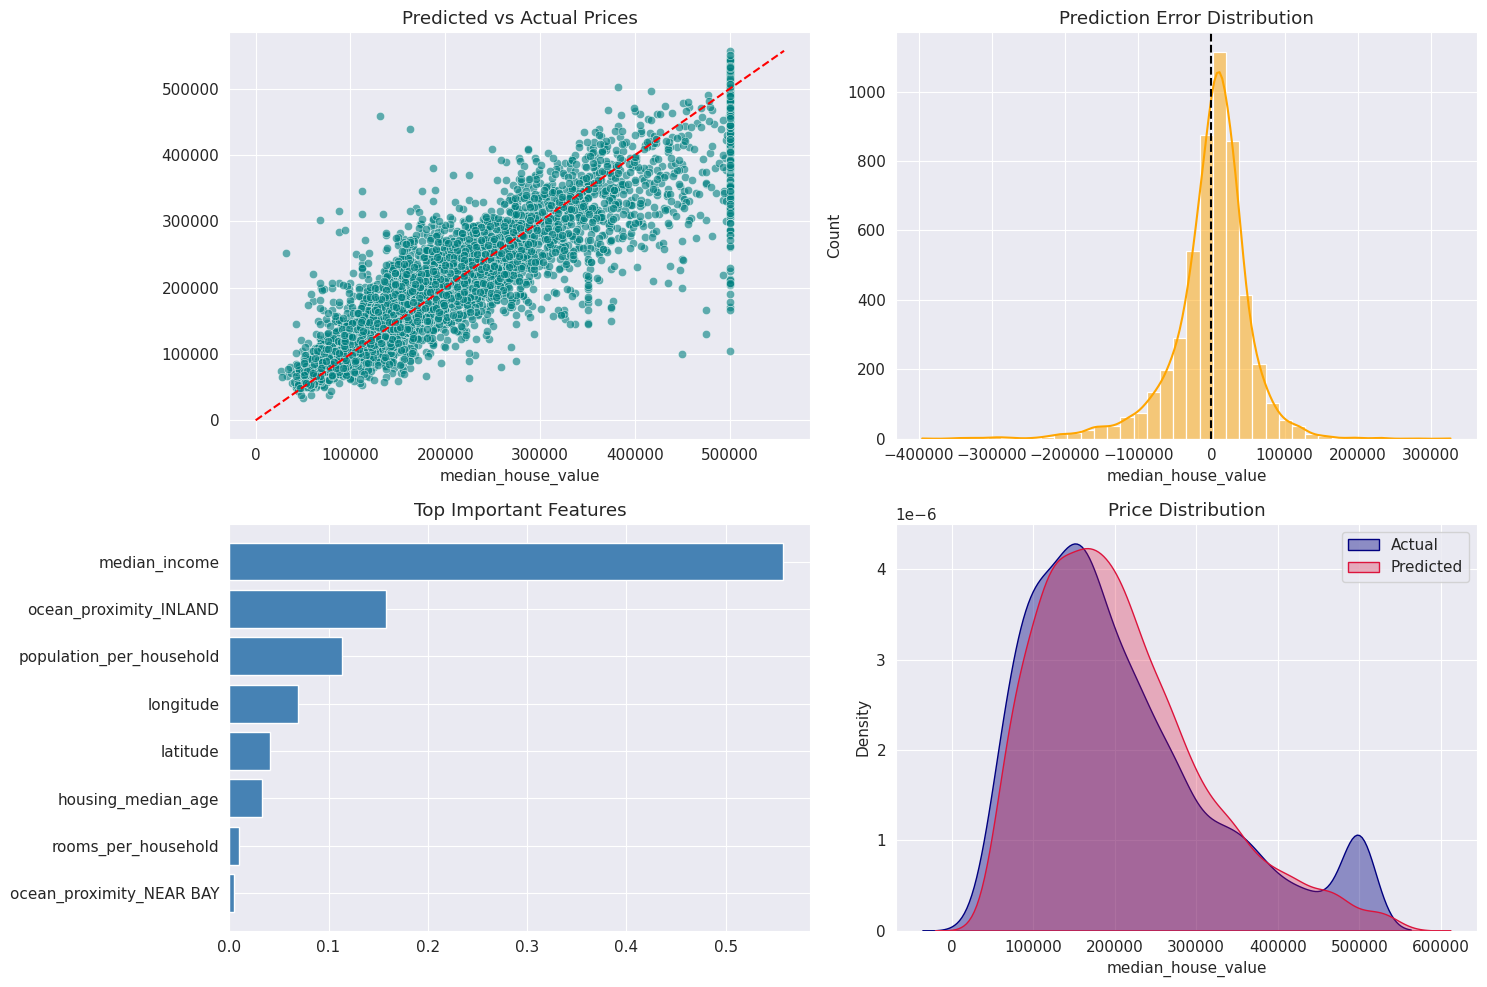


Final Model Performance Summary:


,MAE,RMSE,R2
Linear Regression,"$49,600","$69,045",0.646
Gradient Boosting,"$36,664","$53,732",0.786



Best model: Gradient Boosting
Suggestions:
- Consider adding more geographic details (zip codes, districts)
- Try hyperparameter tuning for even better performance
- Test additional models such as Random Forest or XGBoost


In [1]:
# 🏠 House Price Prediction - Modified Version
# Step 1: Install and import required libraries
!pip install -q seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Ignore warnings for clean output
warnings.filterwarnings('ignore')

# Styling for plots
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (11, 6)
plt.rcParams['font.size'] = 11

# Step 2: Load dataset
print("Loading dataset, please wait...")
!wget -q https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv

housing_data = pd.read_csv('housing.csv')
print("Dataset loaded successfully!")

# Step 3: Initial exploration
print(f"\nDataset Shape: {housing_data.shape}")
print("\nPreview of data:")
display(housing_data.sample(5))  # using sample() instead of head()

print("\nSummary statistics:")
display(housing_data.describe().T)

print("\nMissing values per column:")
print(housing_data.isnull().sum())

# Step 4: Preprocessing
print("\nPreprocessing data...")

# Fill missing values with median
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median())

# Feature engineering (slightly modified)
housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']
housing_data['bedrooms_per_room'] = housing_data['total_bedrooms'] / housing_data['total_rooms']
housing_data['population_per_household'] = housing_data['population'] / housing_data['households']
housing_data['house_age_per_room'] = housing_data['housing_median_age'] / housing_data['total_rooms']  # new feature

# Define features & target
features = housing_data.drop('median_house_value', axis=1)
target = housing_data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=10
)

# Identify column types
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical features:", num_features)
print("Categorical features:", cat_features)

# Preprocessing pipeline
transformer = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Step 5: Train models
print("\nTraining models...")

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=120, learning_rate=0.08, random_state=10
    )
}

model_results = {}
for model_name, model in models.items():
    model.fit(X_train_transformed, y_train)
    preds = model.predict(X_test_transformed)
    model_results[model_name] = {'model': model, 'preds': preds}

# Step 6: Evaluation function
def evaluate_model(name, y_true, y_pred, trained_model):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = trained_model.score(X_test_transformed, y_test)
    print(f"\n{name} Performance:")
    print(f" MAE: ${mae:,.0f}")
    print(f" RMSE: ${rmse:,.0f}")
    print(f" R²: {r2:.3f}")
    return mae, rmse, r2

# Evaluate both models
performance_summary = {}
for model_name, data in model_results.items():
    mae, rmse, r2 = evaluate_model(model_name, y_test, data['preds'], data['model'])
    performance_summary[model_name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Step 7: Visualizations
best_model_name = max(performance_summary, key=lambda x: performance_summary[x]['R2'])
best_preds = model_results[best_model_name]['preds']

plt.figure(figsize=(15, 10))

# 1. Scatter Plot
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=best_preds, alpha=0.6, color='teal')
max_val = max(y_test.max(), best_preds.max())
plt.plot([0, max_val], [0, max_val], 'red', linestyle='--')
plt.title('Predicted vs Actual Prices')

# 2. Error Histogram
plt.subplot(2, 2, 2)
errors = best_preds - y_test
sns.histplot(errors, bins=40, color='orange', kde=True)
plt.axvline(0, color='black', linestyle='--')
plt.title('Prediction Error Distribution')

# 3. Feature Importance
plt.subplot(2, 2, 3)
if hasattr(model_results[best_model_name]['model'], 'feature_importances_'):
    cat_encoder = transformer.named_transformers_['cat']
    cat_feature_names = cat_encoder.get_feature_names_out(cat_features)
    all_features = num_features + list(cat_feature_names)
    importances = model_results[best_model_name]['model'].feature_importances_
    top_idx = np.argsort(importances)[-8:]
    plt.barh(np.array(all_features)[top_idx], importances[top_idx], color='steelblue')
    plt.title('Top Important Features')
else:
    plt.text(0.5, 0.5, "Feature importance not available", ha='center')

# 4. KDE Plot
plt.subplot(2, 2, 4)
sns.kdeplot(y_test, fill=True, label='Actual', color='navy', alpha=0.4)
sns.kdeplot(best_preds, fill=True, label='Predicted', color='crimson', alpha=0.3)
plt.title('Price Distribution')
plt.legend()

plt.tight_layout()
plt.savefig('house_price_prediction_modified.png', dpi=300)
plt.show()

# Step 8: Summary Table
results_df = pd.DataFrame(performance_summary).T
results_df['MAE'] = results_df['MAE'].apply(lambda x: f"${x:,.0f}")
results_df['RMSE'] = results_df['RMSE'].apply(lambda x: f"${x:,.0f}")
results_df['R2'] = results_df['R2'].apply(lambda x: f"{x:.3f}")

print("\nFinal Model Performance Summary:")
display(results_df)

print(f"\nBest model: {best_model_name}")
print("Suggestions:")
print("- Consider adding more geographic details (zip codes, districts)")
print("- Try hyperparameter tuning for even better performance")
print("- Test additional models such as Random Forest or XGBoost")
